In [2]:
import tensorflow_datasets as tfds

In [3]:
import numpy as np
import pandas as pd
from os import sep
from scipy import sparse;
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import regex as re
import pandas as pd
import numpy as np

In [4]:
rating_contents = pd.read_csv('./drive/MyDrive/rating_list.csv', sep=',', encoding='utf-8')

In [5]:
rating_contents = rating_contents[['comment', 'rating']]

In [6]:
rating_contents.dropna(subset=['comment'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
rating_contents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551730 entries, 0 to 569770
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   comment  551730 non-null  object
 1   rating   551730 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 12.6+ MB


In [8]:
!pip install --upgrade pip

     |████████████████████████████████| 1.7 MB 4.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [9]:
!pip install underthesea

     |████████████████████████████████| 7.5 MB 4.8 MB/s            
     |████████████████████████████████| 743 kB 35.3 MB/s            
     |████████████████████████████████| 3.4 MB 41.9 MB/s            
     |████████████████████████████████| 235 kB 48.2 MB/s            
     |████████████████████████████████| 43 kB 2.0 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 3.3 MB 44.5 MB/s            
     |████████████████████████████████| 895 kB 44.9 MB/s            
     |████████████████████████████████| 61 kB 482 kB/s             
     |████████████████████████████████| 596 kB 44.1 MB/s            
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=a4d6799c249a0973b1b9526a3190a1097dae118af18919ce741af8f145d4fdd9
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval
  Attempting uninstall: PyYAML
    Found existing insta

In [10]:
from underthesea import word_tokenize

In [11]:
def remove_html(txt):
    return re.sub(r'<[^>]*>', '', txt)

In [12]:
rating_contents['comment']

0         Tiki bán hàng “treo đầu dê bán thịt chó”, đưa ...
1         sản phẩm tuyệt với. shipper cũng tuyệt vời. ch...
2         sáng nay nhận sữa, 2 mẹ con uống 2 hộp, ói mữa...
3         tiki làm  việc  tắc  trách,  tôi  mua sữa  yom...
4         Theo mình thấy dùng sưa hộp 1 lit mình thấy ng...
                                ...                        
569765    Mình đặt lịch trước nhưng vì tìm đường nên trể...
569766     Không nhiệt tình. Tới trước nhưng vẫn bị sắp sau
569767            thái độ nhân viên vs lễ tân ko vui vẻ lắm
569768    Thái độ nhân viên rất tệ. Lâu lâu còn đòi tiền...
569770    Mình có mua một mã kích hoạt  "khóa học Hacker...
Name: comment, Length: 551730, dtype: object

In [13]:
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
dicchar = loaddicchar()


In [14]:
def convert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [15]:
bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']

In [16]:
nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)


In [17]:
def chuan_hoa_dau_tu_tieng_viet(word):
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0
    nguyen_am_index = []
    qu_or_gi = False
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue
        elif x == 9:  # check qu
            if index != 0 and chars[index - 1] == 'q':
                chars[index] = 'u'
                qu_or_gi = True
        elif x == 5:  # check gi
            if index != 0 and chars[index - 1] == 'g':
                chars[index] = 'i'
                qu_or_gi = True
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]

            return ''.join(chars)

    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
           
        else:
            
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]
    else:
        
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]

    return ''.join(chars)

def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True

def chuan_hoa_dau_cau_tieng_viet(sentence):
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        cw = re.sub(r'(^\p{P}*)([p{L}.]*\p{L}+)(\p{P}*$)', r'\1/\2/\3', word).split('/')
        
        if len(cw) == 3:
            cw[1] = chuan_hoa_dau_tu_tieng_viet(cw[1])
        words[index] = ''.join(cw)
    return ' '.join(words)



In [18]:
def remove_num(line):
  words = line.split(" ")
  res = []
  for word in words:
    w = ''.join(i for i in word if not i.isdigit())
    res.append(w)
  return " ".join(res)

In [19]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
rating_contents["comment"] = rating_contents["comment"].apply(lambda text: remove_urls(text))
rating_contents.head()

,comment,rating
0,"Tiki bán hàng “treo đầu dê bán thịt chó”, đưa ...",1
1,sản phẩm tuyệt với. shipper cũng tuyệt vời. ch...,5
2,"sáng nay nhận sữa, 2 mẹ con uống 2 hộp, ói mữa...",2
3,"tiki làm việc tắc trách, tôi mua sữa yom...",1
4,Theo mình thấy dùng sưa hộp 1 lit mình thấy ng...,4


In [20]:
def remove_blank(text):
  words = text.split(" ")
  res = []
  for word in words:
    if (word != ""):
      res.append(word)
  return " ".join(res)
rating_contents["comment"] = rating_contents["comment"].apply(remove_blank)

In [21]:
!pip install emoji --upgrade

     |████████████████████████████████| 170 kB 4.3 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=bff7e1ed3a4c9cbcfa11b4f868ae9d736f167ee99bb321d4cbd138f0efa89527
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [22]:
!git clone https://github.com/carpedm20/emoji.git

Cloning into 'emoji'...
remote: Enumerating objects: 1328, done.
remote: Counting objects: 100% (561/561), done.
remote: Compressing objects: 100% (373/373), done.
remote: Total 1328 (delta 309), reused 378 (delta 180), pack-reused 767
Receiving objects: 100% (1328/1328), 2.58 MiB | 10.43 MiB/s, done.
Resolving deltas: 100% (723/723), done.


In [23]:
%cd ./emoji
!python setup.py install

/content/emoji
running install
running bdist_egg
running egg_info
creating emoji.egg-info
writing emoji.egg-info/PKG-INFO
writing dependency_links to emoji.egg-info/dependency_links.txt
writing requirements to emoji.egg-info/requires.txt
writing top-level names to emoji.egg-info/top_level.txt
writing manifest file 'emoji.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE.txt'
writing manifest file 'emoji.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/emoji
copying emoji/core.py -> build/lib/emoji
copying emoji/__init__.py -> build/lib/emoji
creating build/lib/emoji/unicode_codes
copying emoji/unicode_codes/__init__.py -> build/lib/emoji/unicode_codes
copying emoji/unicode_codes/data_dict.py -> build/lib/emoji/unicode_codes
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/

In [24]:
%cd ../

/content


In [25]:
!pip install emoji_vietnamese

     |████████████████████████████████| 136 kB 4.3 MB/s            


In [26]:
import emoji_vietnamese
rating_contents['comment'] = rating_contents['comment'].apply(lambda x: emoji_vietnamese.demojize(x))


In [27]:
def text_preprocess(document):
    document = remove_html(document)
    document = remove_num(document)
    document = convert_unicode(document)
    document = chuan_hoa_dau_cau_tieng_viet(document)
    document = word_tokenize(document, format="text")
    document = document.lower()
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    document = re.sub(r'\s+', ' ', document).strip()
    return document

In [28]:
text_preprocess('Đại học Bách Khoa Hà Nội.')

'đại_học bách_khoa hà_nội'

In [29]:
stopword = set()
with open('./drive/MyDrive/stop_words.txt', 'r') as fp:
      for line in fp.readlines():
        stopword.add(line.strip())
    

In [30]:
def remove_stopwords(line):
    words = []
    for word in line.split():
        if word not in stopword:
            words.append(word)
    return ' '.join(words)

In [31]:
def other_2_str(x):
  return str(x)

In [32]:
rating_contents['comment'] = rating_contents['comment'].apply(other_2_str).apply(remove_stopwords)

In [33]:
rating_contents['comment'] = rating_contents['comment'].apply(text_preprocess)

In [34]:
def removeNumber(line):
  res = ''.join([i for i in line if not i.isdigit()])
  return res

In [35]:
rating_contents['comment'] = rating_contents['comment'].apply(removeNumber)

In [36]:
from collections import Counter
cnt = Counter()
for text in rating_contents["comment"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('hàng', 228148),
 ('giao', 152059),
 ('sản_phẩm', 103473),
 ('mua', 97882),
 ('đẹp', 80085),
 ('ok', 71311),
 ('ko', 61426),
 ('giá', 59837),
 ('tiki', 59744),
 ('chất', 57709)]

In [37]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(4)])
FREQWORDS.add('giá')
FREQWORDS.add('tiki')
FREQWORDS.add('icon')
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

rating_contents["comment"] = rating_contents["comment"].apply(lambda text: remove_freqwords(text))
rating_contents.head()

,comment,rating
0,treo đầu dê thịt chó hình_ảnh thùng sữa yomost...,1
1,tuyệt với shipper tuyệt_vời bao shipper tâm ng...,5
2,sữa mẹ uống hộp ói mữa ngày tiêu tức ngực chịu...,2
3,tắc_trách sữa yomost uống bé ỉa_chảy ói mửa lu...,1
4,theo sưa hộp lit ngon hơn cảm_giác hộp sữa băn...,4


In [38]:
n_rare_words = 100
RAREWORDS = set()

for w, wc in cnt.most_common()[::-1]:
  if (wc == 1):
    RAREWORDS.add(w)
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

rating_contents["comment"] = rating_contents["comment"].apply(lambda text: remove_rarewords(text))
rating_contents.head()

,comment,rating
0,treo đầu dê thịt chó hình_ảnh thùng sữa yomost...,1
1,tuyệt với shipper tuyệt_vời bao shipper tâm ng...,5
2,sữa mẹ uống hộp ói mữa ngày tiêu tức ngực chịu...,2
3,tắc_trách sữa yomost uống bé ỉa_chảy ói mửa lu...,1
4,theo sưa hộp lit ngon hơn cảm_giác hộp sữa băn...,4


In [39]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
rating_contents["comment"] = rating_contents["comment"].apply(lambda text: remove_urls(text))
rating_contents.head()

,comment,rating
0,treo đầu dê thịt chó hình_ảnh thùng sữa yomost...,1
1,tuyệt với shipper tuyệt_vời bao shipper tâm ng...,5
2,sữa mẹ uống hộp ói mữa ngày tiêu tức ngực chịu...,2
3,tắc_trách sữa yomost uống bé ỉa_chảy ói mửa lu...,1
4,theo sưa hộp lit ngon hơn cảm_giác hộp sữa băn...,4


In [40]:
rating_contents.head()

,comment,rating
0,treo đầu dê thịt chó hình_ảnh thùng sữa yomost...,1
1,tuyệt với shipper tuyệt_vời bao shipper tâm ng...,5
2,sữa mẹ uống hộp ói mữa ngày tiêu tức ngực chịu...,2
3,tắc_trách sữa yomost uống bé ỉa_chảy ói mửa lu...,1
4,theo sưa hộp lit ngon hơn cảm_giác hộp sữa băn...,4


In [41]:
rating_contents.to_csv('./drive/MyDrive/modified_rating_list.csv', sep=',', encoding='utf-8', index=False)

In [42]:
rating_contents = pd.read_csv('./drive/MyDrive/modified_rating_list.csv', sep=',', encoding='utf-8')

In [43]:
contents = rating_contents['comment'].tolist()

In [44]:
contents = [str(content) for content in contents]

In [45]:
len(contents)

551730

In [46]:
train_contents = contents[:500000]
test_contents = contents[500000:]

In [47]:
val_contents = train_contents[400000:]
train_contents = train_contents[:400000]

In [48]:
labels = []

In [49]:
for rating in rating_contents['rating']:
  if (int(rating) <= 3):
    labels.append(0)
  elif (int(rating) == 4):
    labels.append(1)
  else:
    labels.append(2)
 

In [50]:
ratings = rating_contents['rating'].tolist()

In [51]:
train_labels = labels[:500000]
test_labels = labels[500000:]


In [52]:
val_labels = train_labels[400000:]
train_labels = train_labels[:400000]

In [53]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
val_labels = np.array(val_labels)

In [54]:
np.unique(train_labels)

array([0, 1, 2])

In [55]:
np.unique(test_labels)

array([0, 1, 2])

In [56]:
test_labels

array([2, 1, 2, ..., 0, 0, 0])

In [57]:
contents

['treo đầu dê thịt chó hình_ảnh thùng sữa yomost quà tặng kèm bình nhiệt yomost hạn khuyến_mãi hàng_hàng khi bình nhiệt gọi hotline tư_vấn nguyễn_vũ thùy anh không quà tặng sau chứng hỉnh ảnh quảng_cáo hình đính kèm dưới nhân_viên nguyễn_vũ thùy anh bộ_phận đóng_gói quyền tách quà tặng phục_vụ mục_đích khác đề_nghị phản_hồi bất từ bao thương_hiệu nhân_viên quyền cắp quà tặng khuyến_mãi sản_xuất trắng_trợn vậy từ nhân_viên tư_vấn thái_độ hách_dịch coi hay thực treo đầu dê thịt chó sách kinh_doanh ps tôi gửi chăm_sóc tải thông mã đơn tk',
 'tuyệt với shipper tuyệt_vời bao shipper tâm nghề vậy gọi ko đc đt chế_độ im_lặng ngủ trưa shipper gửi xe_hàng chốt mượn xe_đạp kiếm nhà gọi cảm_ơn shipper nhìu lam luôn dịch dự_kiến luôn',
 'sữa mẹ uống hộp ói mữa ngày tiêu tức ngực chịu uống sữa ngày đợt vậy date cũ nữa hạn ko trách_nhiệm ko',
 'tắc_trách sữa yomost uống bé ỉa_chảy ói mửa luôn đứa khiếu_nại im_lặng đừng k',
 'theo sưa hộp lit ngon hơn cảm_giác hộp sữa băng hộp bình thương về đóng_gói

In [58]:
remove_stopwords('mình mua lúc khuyến_mãi được tặng ly rap việt giao hàng thì tiki tách thành  đơn hàng tiki mới giao thùng pepsi thôi còn hàng tặng thì vẫn thấy hi_vọng tiki sẽ giao đúng lịch hẹn')

'mua khuyến_mãi tặng ly rap việt giao hàng tiki tách thành đơn hàng tiki giao thùng pepsi hàng tặng hi_vọng tiki giao lịch hẹn'

In [59]:
vocab_size = 10000
embedding_dim = 64
max_length = 500

In [60]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [61]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token="<OOV>", filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')

In [62]:
tokenizer.fit_on_texts(train_contents)

In [63]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'đẹp': 2,
 'ok': 3,
 'ko': 4,
 'tốt': 5,
 'nhanh': 6,
 'chất': 7,
 'đóng_gói': 8,
 'hơi': 9,
 'shop': 10,
 'k': 11,
 'mình': 12,
 'sử_dụng': 13,
 'cẩn_thận': 14,
 'máy': 15,
 'lắm': 16,
 'ngon': 17,
 'sp': 18,
 'ổn': 19,
 'màu': 20,
 'gói': 21,
 'hài': 22,
 'mặt': 23,
 'hộp': 24,
 'xài': 25,
 'chắn': 26,
 'hình': 27,
 'mùi': 28,
 'đc': 29,
 'tặng': 30,
 'thơm': 31,
 'trái_tim': 32,
 'rẻ': 33,
 'cười': 34,
 'da': 35,
 'đóng': 36,
 'đi': 37,
 'tiền': 38,
 'được': 39,
 'thích': 40,
 'rất': 41,
 'ủng_hộ': 42,
 'nan': 43,
 'thời_gian': 44,
 'không': 45,
 'thử': 46,
 'hãng': 47,
 'nha': 48,
 'sách': 49,
 'đầu': 50,
 'cảm_ơn': 51,
 'sữa': 52,
 'mắt': 53,
 'luôn': 54,
 'đỏ': 55,
 'rồi': 56,
 'kèm': 57,
 'đôi': 58,
 'bộ': 59,
 'dùng': 60,
 'nhẹ': 61,
 'nhưng': 62,
 'đánh_giá': 63,
 'chất_lượng': 64,
 'to': 65,
 'lắp': 66,
 'đổi': 67,
 'hôm': 68,
 'bé': 69,
 'hài_lòng': 70,
 'có': 71,
 'uống': 72,
 'khuôn_mặt': 73,
 'êm': 74,
 'này': 75,
 'mô_tả': 76,
 'quà': 77,
 'phù_hợp': 78,
 '

In [64]:
train_sequences = tokenizer.texts_to_sequences(train_contents)

In [65]:
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length, truncating='post', padding='post')

In [66]:
test_sequences = tokenizer.texts_to_sequences(test_contents)
val_sequences = tokenizer.texts_to_sequences(val_contents)

In [67]:
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length, truncating='post', padding='post')
padded_val_sequences = pad_sequences(val_sequences, maxlen=max_length, truncating='post', padding='post')

In [68]:
padded_val_sequences

array([[   2,   76,    0, ...,    0,    0,    0],
       [ 225,  212, 2320, ...,    0,    0,    0],
       [ 199,   16,   33, ...,    0,    0,    0],
       ...,
       [ 138,   22,  156, ...,    0,    0,    0],
       [1199,    9, 1098, ...,    0,    0,    0],
       [   6,  161,    2, ...,    0,    0,    0]], dtype=int32)

In [69]:
from tensorflow.keras.models import Sequential

In [70]:
from tensorflow.keras.layers import Embedding

In [71]:
from tensorflow.keras.layers import Flatten

In [72]:
from tensorflow.keras.layers import Dense

In [73]:
from tensorflow.keras.layers import Dropout

In [74]:
model = Sequential()

In [75]:
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

In [76]:
model.add(Flatten())

In [77]:
model.add(Dense(64, activation='relu'))

In [78]:
model.add(Dense(3, activation='softmax'))

In [79]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 64)           640000    
                                                                 
 flatten (Flatten)           (None, 32000)             0         
                                                                 
 dense (Dense)               (None, 64)                2048064   
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 2,688,259
Trainable params: 2,688,259
Non-trainable params: 0
_________________________________________________________________


In [81]:
padded_test_sequences.shape

(51730, 500)

In [82]:
test_labels

array([2, 1, 2, ..., 0, 0, 0])

In [83]:
padded_test_sequences

array([[1435, 4713,  586, ...,    0,    0,    0],
       [  18,    5,  254, ...,    0,    0,    0],
       [ 195,    7,  254, ...,    0,    0,    0],
       ...,
       [ 752,  127,  288, ...,    0,    0,    0],
       [ 752,  127,  163, ...,    0,    0,    0],
       [  12,  312,  758, ...,    0,    0,    0]], dtype=int32)

In [84]:
from keras.utils import np_utils
train_l = np_utils.to_categorical(train_labels,3)
test_l = np_utils.to_categorical(test_labels, 3)
val_l = np_utils.to_categorical(val_labels, 3)

In [85]:
train_l

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [86]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)


In [87]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode="min", patience=5)

In [88]:
padded_train_sequences.shape

(400000, 500)

In [89]:
train_l.shape

(400000, 3)

In [90]:
padded_val_sequences.shape

(100000, 500)

In [91]:
model.fit(padded_train_sequences, train_l, epochs=100, batch_size=128, validation_data=(padded_val_sequences, val_l), callbacks=[callback])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100
3125/3125 [==============================] - 101s 32ms/step - loss: 0.5997 - acc: 0.7729 - val_loss: 0.5996 - val_acc: 0.7700
Epoch 2/100
3125/3125 [==============================] - 98s 31ms/step - loss: 0.5530 - acc: 0.7905 - val_loss: 0.6022 - val_acc: 0.7712
Epoch 3/100
3125/3125 [==============================] - 99s 32ms/step - loss: 0.5202 - acc: 0.8023 - val_loss: 0.6123 - val_acc: 0.7684
Epoch 4/100
3125/3125 [==============================] - 99s 32ms/step - loss: 0.4769 - acc: 0.8205 - val_loss: 0.6541 - val_acc: 0.7584
Epoch 5/100
3125/3125 [==============================] - 98s 31ms/step - loss: 0.4377 - acc: 0.8378 - val_loss: 0.7158 - val_acc: 0.7463
Epoch 6/100
3125/3125 [==============================] - 96s 31ms/step - loss: 0.4070 - acc: 0.8502 - val_loss: 0.7617 - val_acc: 0.7520


In [92]:
test_predicted = model.predict(padded_test_sequences)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [93]:
test_predicted

array([[1.08742185e-01, 1.18150622e-01, 7.73107231e-01],
       [1.77945167e-01, 7.40692198e-01, 8.13626200e-02],
       [1.82234769e-04, 6.36947202e-03, 9.93448317e-01],
       ...,
       [8.93072069e-01, 4.81176525e-02, 5.88102899e-02],
       [8.27497005e-01, 1.20780140e-01, 5.17228432e-02],
       [1.00000000e+00, 3.27395107e-14, 4.25180655e-11]], dtype=float32)

In [94]:
predicted_labels = []

In [95]:

for result_one_hot_predicted in test_predicted:
  rating_predicted = np.argmax(result_one_hot_predicted)
  predicted_labels.append(rating_predicted)


In [96]:
predicted_labels

[2,
 1,
 2,
 0,
 2,
 0,
 2,
 1,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 2,


In [97]:
test_labels

array([2, 1, 2, ..., 0, 0, 0])

In [98]:
len(test_labels)

51730

In [99]:
import seaborn as sns

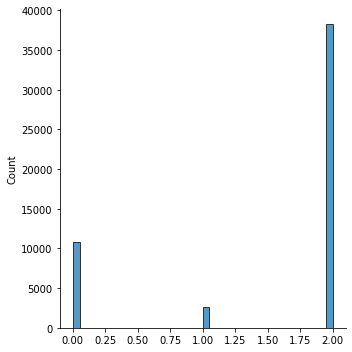

In [100]:
sns.displot(predicted_labels, )

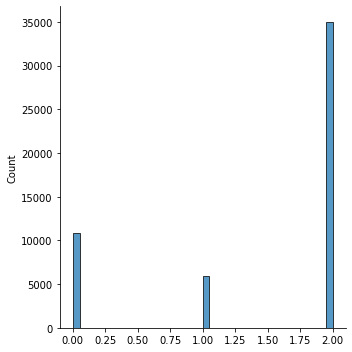

In [101]:
sns.displot(test_labels, )

In [102]:
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(test_labels, predicted_labels))

accuracy =  0.7929054707133192


In [103]:
def my_confusion_matrix(y_true, y_pred):
    N = np.unique(y_true).shape[0] # number of classes 
    cm = np.zeros((N, N))
    for n in range(y_true.shape[0]):
        cm[y_true[n], y_pred[n]] += 1
    return cm 
cnf_matrix = my_confusion_matrix(test_labels, predicted_labels)
print('Confusion matrix:')
print(cnf_matrix)
print('\nAccuracy:', np.diagonal(cnf_matrix).sum()/cnf_matrix.sum())

Confusion matrix:
[[ 7830.   757.  2209.]
 [ 1335.   847.  3717.]
 [ 1662.  1033. 32340.]]

Accuracy: 0.7929054707133192


In [104]:
def cm2pr_binary(cm):
    p0 = cm[0,0]/np.sum(cm[:,0])
    p1 = cm[1,1]/np.sum(cm[:,1])
    p2 = cm[2,2]/np.sum(cm[:,2])
    r0 = cm[0,0]/np.sum(cm[0])
    r1 = cm[1,1]/np.sum(cm[1])
    r2 = cm[2,2]/np.sum(cm[2])
    return (p0, p1, p2, r0, r1, r2)

cm = np.array(cnf_matrix)
p0, p1, p2, r0, r1, r2 = cm2pr_binary(cm)
print("precition_0 = {0:.2f}, recall_0 = {1:.2f}".format(p0, r0))
print("precition_1 = {0:.2f}, recall_1 = {1:.2f}".format(p1, r1))
print("precition_2 = {0:.2f}, recall_2 = {1:.2f}".format(p2, r2))

precition_0 = 0.72, recall_0 = 0.73
precition_1 = 0.32, recall_1 = 0.14
precition_2 = 0.85, recall_2 = 0.92


In [105]:
embedding_layer = model.layers[0]

In [106]:
weights = embedding_layer.get_weights()[0]

In [107]:
weights

array([[ 0.0032406 , -0.00093032,  0.00454437, ..., -0.00050956,
         0.0022486 , -0.00622615],
       [-0.02706216,  0.00320531, -0.00263866, ...,  0.01137357,
         0.04852765, -0.04184017],
       [ 0.16012149, -0.15823522, -0.15694036, ...,  0.10935136,
         0.0149039 ,  0.09147654],
       ...,
       [-0.10813376,  0.02061652,  0.01184759, ...,  0.00909151,
        -0.02022414, -0.00845236],
       [-0.14160152,  0.20243505, -0.10966865, ...,  0.14038429,
         0.14369288,  0.25576872],
       [ 0.14398733, -0.28969046,  0.04390111, ...,  0.19236273,
         0.1946631 ,  0.15850744]], dtype=float32)

In [108]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for idx in range(1, vocab_size):
  word = tokenizer.index_word[idx]
  vector = weights[idx]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(vi) for vi in vector]) + "\n")

out_m.close()
out_v.close()

In [109]:
model_json = model.to_json()

In [110]:
with open("./drive/MyDrive/model.json", "w") as json_file:
  json_file.write(model_json)

In [111]:
model.save_weights("./drive/MyDrive/model.h5")

In [112]:
json_file = open('./drive/MyDrive/model.json', 'r')

In [113]:
loaded_model_json = json_file.read()

In [114]:
json_file.close()

In [115]:
from keras.models import model_from_json
loaded_model = model_from_json(loaded_model_json)

In [116]:
loaded_model.load_weights('./drive/MyDrive/model.h5')

In [117]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [118]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 64)           640000    
                                                                 
 flatten (Flatten)           (None, 32000)             0         
                                                                 
 dense (Dense)               (None, 64)                2048064   
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 2,688,259
Trainable params: 2,688,259
Non-trainable params: 0
_________________________________________________________________


In [120]:
con = "Không hài lòng"
con = remove_stopwords(con)
con = text_preprocess(con)
test_cons = [con]
test_seq = tokenizer.texts_to_sequences(test_cons)
padded_test_seq = pad_sequences(test_seq, maxlen=max_length, truncating='post', padding='post') 

result_one_hot_predicted = model.predict(padded_test_seq)
print(np.amax(result_one_hot_predicted))

rating_predicted = np.argmax(result_one_hot_predicted)
rating_predicted

0.8929663


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


0

In [121]:
# def suggest_movie_by_ratings(con):
#   test_cons = [con]
#   test_cons = [remove_stop_words(con) for con in test_cons]
#   test_seq = tokenizer.texts_to_sequences(test_cons)
#   padded_test_seq = pad_sequences(test_seq, maxlen=max_length, truncating='post', padding='post') 
#   result_one_hot_predicted = model.predict(padded_test_seq)
#   rating_predicted = np.argmax(result_one_hot_predicted)
#   if (rating_predicted >= 2):
#     return True
#   return False


In [122]:
#!pip install emot

In [123]:
#import re
#import emot

In [124]:
#emot.core.emot() 

In [125]:
# def remove_urls(text):
#     url_pattern = re.compile(r'https?://\S+|www\.\S+')
#     return url_pattern.sub(r'', text)